<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-20 05:16:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-04-20 05:16:49 (13.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

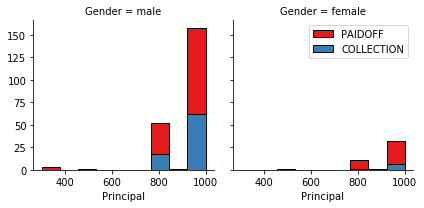

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

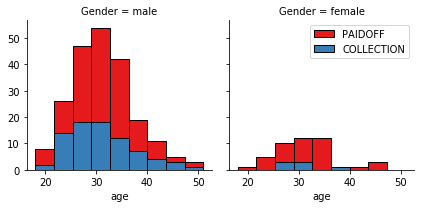

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

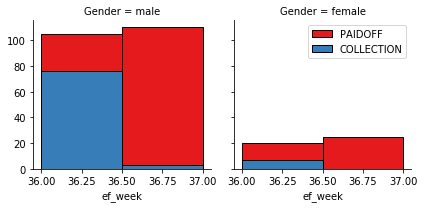

In [10]:
df['ef_week'] = df['effective_date'].dt.weekofyear
bins = np.linspace(df.ef_week.min(), df.ef_week.max(), df['ef_week'].value_counts().size + 1)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ef_week', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

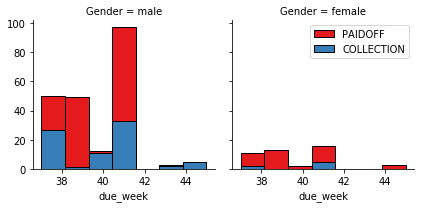

In [11]:
df['due_week'] = df['due_date'].dt.weekofyear
bins = np.linspace(df.due_week.min(), df.due_week.max(), df['due_week'].value_counts().size + 1)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'due_week', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

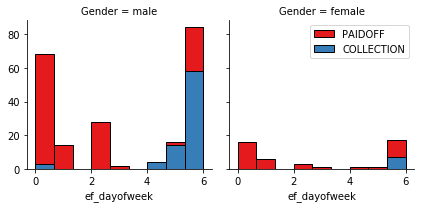

In [12]:
df['ef_dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.ef_dayofweek.min(), df.ef_dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ef_dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


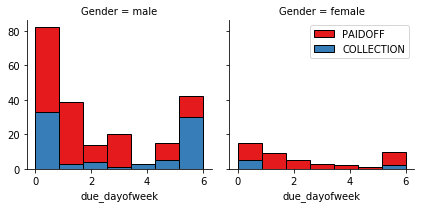

In [13]:
df['due_dayofweek'] = df['due_date'].dt.dayofweek
bins = np.linspace(df.due_dayofweek.min(), df.due_dayofweek.max(), df['due_dayofweek'].value_counts().size + 1)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'due_dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['ef_weekend'] = df['ef_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['due_midweek'] = df['due_dayofweek'].apply(lambda x: 0 if (x==0 or x==6) else 1 )
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,ef_week,due_week,ef_dayofweek,due_dayofweek,ef_weekend,due_midweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,36,40,3,4,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,36,40,3,4,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,36,38,3,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,36,40,4,5,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,36,40,4,5,1,1


## Convert Categorical features to numerical values

Lets look at gender:

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,ef_week,due_week,ef_dayofweek,due_dayofweek,ef_weekend,due_midweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,36,40,3,4,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,36,40,3,4,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,36,38,3,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,36,40,4,5,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,36,40,4,5,1,1


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','ef_week', 'due_week', 'ef_weekend', 'due_midweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,ef_week,due_week,ef_weekend,due_midweek,Bechalor,High School or Below,college
0,1000,30,45,0,36,40,0,1,0,1,0
1,1000,30,33,1,36,40,0,1,1,0,0
2,1000,15,27,0,36,38,0,1,0,0,1
3,1000,30,28,1,36,40,1,1,0,0,1
4,1000,30,29,0,36,40,1,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,ef_week,due_week,ef_weekend,due_midweek,Bechalor,High School or Below,college
0,1000,30,45,0,36,40,0,1,0,1,0
1,1000,30,33,1,36,40,0,1,1,0,0
2,1000,15,27,0,36,38,0,1,0,0,1
3,1000,30,28,1,36,40,1,1,0,0,1
4,1000,30,29,0,36,40,1,1,0,0,1


What are our lables?

In [21]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.81453148,
         0.04344122, -1.20577805,  1.31316772, -0.38170062,  1.13639374,
        -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -0.81453148,
         0.04344122, -1.20577805,  1.31316772,  2.61985426, -0.87997669,
        -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.81453148,
        -1.15901187, -1.20577805,  1.31316772, -0.38170062, -0.87997669,
         1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -0.81453148,
         0.04344122,  0.82934003,  1.31316772, -0.38170062, -0.87997669,
         1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -0.81453148,
         0.04344122,  0.82934003,  1.31316772, -0.38170062, -0.87997669,
         1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 11) (276,)
Test set: (70, 11) (70,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMtx = []
for n in range(1, Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.71428571, 0.67142857, 0.78571429, 0.67142857, 0.74285714,
       0.7       , 0.68571429, 0.67142857, 0.71428571, 0.71428571,
       0.74285714, 0.7       , 0.68571429, 0.67142857, 0.68571429,
       0.71428571, 0.71428571, 0.67142857, 0.7       , 0.67142857])

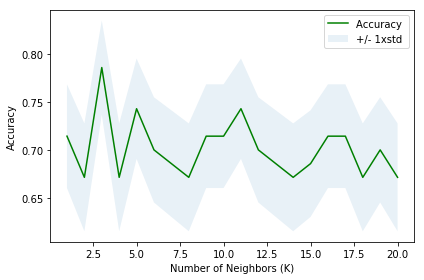

In [25]:
plt.plot(range(1, Ks), mean_acc, 'g')
z = 1
plt.fill_between(range(1, Ks), mean_acc - z * std_acc, mean_acc + z * std_acc, alpha=0.1)
plt.legend(('Accuracy ', '+/- ' + str(z) +'xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
yhat = neigh.predict(X_test)
print("f1 score:", f1_score(y_test, yhat, average='weighted'))
print("jaccard score:", jaccard_similarity_score(y_test, yhat))

f1 score: 0.7563025210084033
jaccard score: 0.7857142857142857


In [27]:
#retrain with whole data
neigh = KNeighborsClassifier(n_neighbors=3).fit(X, y)

# Decision Tree

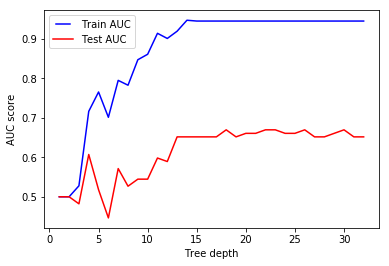

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

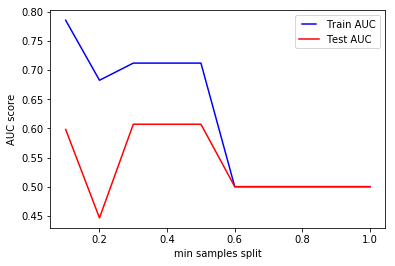

In [29]:
# from the above graph, choose max_depth=13
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(max_depth=13,min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

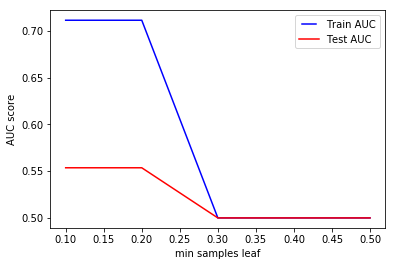

In [30]:
#from the above graph, choose min_sample_split=0.4
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(max_depth=13, min_samples_split=0.4, min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

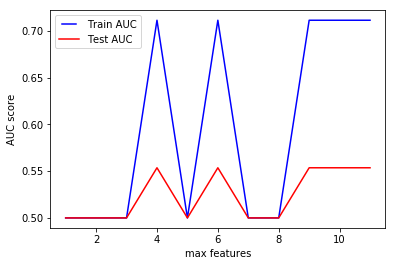

In [32]:
#from the above graph, choose min_samples_leaf=0.2
max_features = list(range(1,X_train.shape[1]+1))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_depth=13,min_samples_split=0.4, min_samples_leaf=0.2, max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [33]:
#after many run max_feature's result varies with random value, therefore, I let max_features to be default
#retrain with whole data
loanTree = DecisionTreeClassifier(max_depth=13,min_samples_split=0.4, min_samples_leaf=0.2)
loanTree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.2, min_samples_split=0.4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [35]:
#from sklearn.externals.six import StringIO
#import pydotplus
#import matplotlib.image as mpimg
#from sklearn import tree
#dot_data = StringIO()
#filename = "loantree.png"
#featureNames = Feature.columns.values.tolist()
#targetNames = np.unique(y).tolist()
#out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
svmclf = grid.fit(X,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

In [36]:
svmclf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(-3, 3, 7)

# Specify solver
solver = ['liblinear', 'saga']

# Create hyperparameter options
hyperparameters = dict(C=C,penalty=penalty,solver=solver)

# Create logistic regression
logistic = LogisticRegression()

# Create grid search using 5-fold cross validation
lrclf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [39]:
# Fit grid search
LR = lrclf.fit(X, y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The ma

In [40]:
lrclf.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

# Model Evaluation using Test set

In [41]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [42]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-04-20 03:07:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-04-20 03:07:34 (372 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [43]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [44]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['ef_week'] = test_df['effective_date'].dt.weekofyear
test_df['due_week'] = test_df['due_date'].dt.weekofyear
test_df['ef_dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['ef_weekend'] = test_df['ef_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['due_dayofweek'] = test_df['due_date'].dt.dayofweek
test_df['due_midweek'] = test_df['due_dayofweek'].apply(lambda x: 0 if (x==0 or x==6) else 1 )
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)

In [45]:
test_df.dropna()
print(test_df.shape)
test_df.head()

(54, 16)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,ef_week,due_week,ef_dayofweek,ef_weekend,due_dayofweek,due_midweek
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,36,40,3,0,4,1
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,36,37,4,1,3,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,36,40,5,1,6,0
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,36,40,5,1,6,0
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,36,38,6,1,6,0


In [46]:
Feature2 = test_df[['Principal','terms','age','Gender','ef_week', 'due_week', 'ef_weekend', 'due_midweek']]
Feature2 = pd.concat([Feature2,pd.get_dummies(test_df['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)

In [47]:
X_eva = Feature2
y_eva = test_df['loan_status'].values

In [48]:
# KNN evaluation
y_ehat = neigh.predict(X_eva)
f1_knn = f1_score(y_eva, y_ehat, average='weighted')
jc_knn = jaccard_similarity_score(y_eva, y_ehat)
print("KNN f1 score:", f1_knn)
print("KNN jaccard score:", jc_knn)

KNN f1 score: 0.6304176516942475
KNN jaccard score: 0.7407407407407407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
# Decision Tree evaluation
y_treehat = loanTree.predict(X_eva)
f1_dct = f1_score(y_eva, y_treehat, average='weighted')
jc_dct = jaccard_similarity_score(y_eva, y_treehat)
print("DCS tree f1 score:", f1_dct)
print("DCS tree jaccard score:", jc_dct)

DCS tree f1 score: 0.6304176516942475
DCS tree jaccard score: 0.7407407407407407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
# SVM evaluation
y_svmhat = svmclf.predict(X_eva)
f1_svm = f1_score(y_eva, y_svmhat, average='weighted')
jc_svm = jaccard_similarity_score(y_eva, y_svmhat)
print("SVM f1 score:", )
print("SVM jaccard score:", jc_svm)

SVM f1 score:
SVM jaccard score: 0.7407407407407407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
# Logistic Regression evaluation
y_lrhat = LR.predict(X_eva)
y_proba = LR.predict_proba(X_eva)
f1_lr = f1_score(y_eva, y_lrhat, average='weighted')
jc_lr = jaccard_similarity_score(y_eva, y_lrhat)
ll_lr = log_loss(y_eva, y_proba)
print("Logistic Regresion f1 score:", f1_lr)
print("Logistic Regresion jaccard score:", jc_lr)
print("Logistic Regresion log_loss", ll_lr)

Logistic Regresion f1 score: 0.6304176516942475
Logistic Regresion jaccard score: 0.7407407407407407
Logistic Regresion log_loss 0.5754942447065811


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [52]:
algo_list = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
jc_list = [jc_knn, jc_dct, jc_svm, jc_lr]
f1_list = [f1_knn, f1_dct, f1_svm, f1_lr]
ll_list = ['NA', 'NA', 'NA', ll_lr]
rp_data = {'Algorithm':algo_list, 'Jaccard':jc_list, 'F1-score':f1_list, 'LogLoss':ll_list}
rp = pd.DataFrame(rp_data)
rp

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.740741,0.630418,NA
1,Decision Tree,0.740741,0.630418,NA
2,SVM,0.740741,0.630418,NA
3,Logistic Regression,0.740741,0.630418,0.575494


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>